In [24]:
!pip install pandas numpy scikit-learn statsmodels matplotlib scipy




[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [30]:
import pandas as pd
import numpy as np
df = pd.read_csv("../data/raw_data.csv")


In [ ]:
categorical_col = []
numerical_col = []
df_rel = df.drop(["id","name","description","first_review","host_since","last_review","neighbourhood",
            "thumbnail_url", "zipcode"],axis=1 )
for column in df_rel.columns:
    
    if df[column].dtypes != "float64" and df[column].dtypes != "int64":
        categorical_col.append(column)
    else:
        numerical_col.append(column)

In [33]:
categorical_col

['property_type',
 'room_type',
 'amenities',
 'bed_type',
 'cancellation_policy',
 'cleaning_fee',
 'city',
 'host_has_profile_pic',
 'host_identity_verified',
 'host_response_rate',
 'instant_bookable']

In [34]:
numerical_col

['log_price',
 'accommodates',
 'bathrooms',
 'latitude',
 'longitude',
 'number_of_reviews',
 'review_scores_rating',
 'bedrooms',
 'beds']

In [5]:
columns_null = df.isnull().sum()
columns_null = columns_null[columns_null > 0]
columns_null

bathrooms                   200
first_review              15864
host_has_profile_pic        188
host_identity_verified      188
host_response_rate        18299
host_since                  188
last_review               15827
neighbourhood              6872
review_scores_rating      16722
thumbnail_url              8216
zipcode                     966
bedrooms                     91
beds                        131
dtype: int64

In [6]:
numcolumns = df[numerical_col].isnull().sum()
numcolumns_null = numcolumns[numcolumns > 0]
numcolumns_null

bathrooms                 200
review_scores_rating    16722
bedrooms                   91
beds                      131
dtype: int64

In [7]:
df[numcolumns_null.index] = df[numcolumns_null.index].fillna(df[numcolumns_null.index].median())

In [8]:
for i in categorical_col:
    mostfrequent = df[i].value_counts().idxmax()
    df[i] = df[i].fillna(mostfrequent)


In [9]:
df.dtypes

id                          int64
log_price                 float64
property_type              object
room_type                  object
amenities                  object
accommodates                int64
bathrooms                 float64
bed_type                   object
cancellation_policy        object
cleaning_fee                 bool
city                       object
description                object
first_review               object
host_has_profile_pic       object
host_identity_verified     object
host_response_rate         object
host_since                 object
instant_bookable           object
last_review                object
latitude                  float64
longitude                 float64
name                       object
neighbourhood              object
number_of_reviews           int64
review_scores_rating      float64
thumbnail_url              object
zipcode                    object
bedrooms                  float64
beds                      float64
dtype: object

In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in categorical_col:
    df[col] = le.fit_transform(df[col])

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error, mean_squared_error
models = ["Linear Regression","DTreeReg","RandomForest","GradientBoosting"]

x = df.drop(["id","name","log_price","description","first_review","host_since","last_review","neighbourhood",
            "thumbnail_url", "zipcode"],axis = 1)
y = df["log_price"]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)


    

In [36]:
x.columns

Index(['property_type', 'room_type', 'amenities', 'accommodates', 'bathrooms',
       'bed_type', 'cancellation_policy', 'cleaning_fee', 'city',
       'host_has_profile_pic', 'host_identity_verified', 'host_response_rate',
       'instant_bookable', 'latitude', 'longitude', 'number_of_reviews',
       'review_scores_rating', 'bedrooms', 'beds'],
      dtype='object')

In [ ]:
import statsmodels.api as sm
x_ols = x
x_ols = sm.add_constant(x_ols)
modelo_ols = sm.OLS(y,x_ols).fit()
print(modelo_ols.summary())

#O modelo tem 0.535 R2, portanto, 

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.535
Model:                            OLS   Adj. R-squared:                  0.535
Method:                 Least Squares   F-statistic:                     4494.
Date:                qua, 07 jan 2026   Prob (F-statistic):               0.00
Time:                        08:02:05   Log-Likelihood:                -52139.
No. Observations:               74111   AIC:                         1.043e+05
Df Residuals:                   74091   BIC:                         1.045e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      1

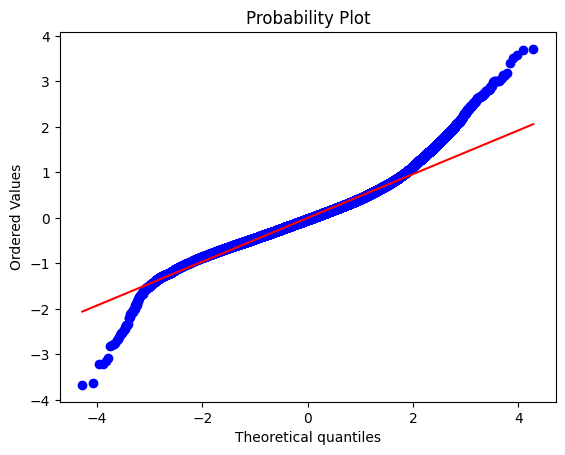

In [16]:

import matplotlib.pyplot as plt
import scipy.stats as stats

residuos = modelo_ols.resid
stats.probplot(residuos, dist="norm", plot=plt)
plt.show()


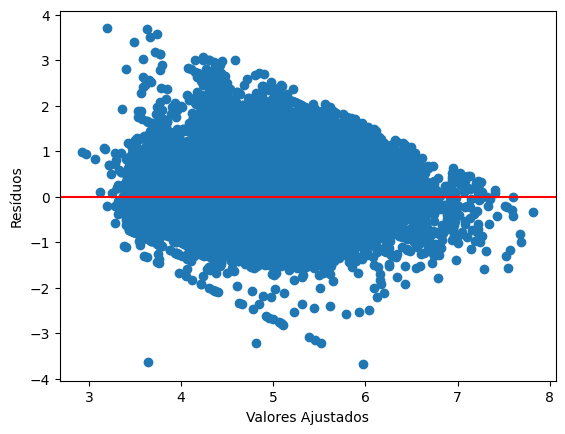

In [18]:

plt.scatter(modelo_ols.fittedvalues, residuos)
plt.axhline(0, color='red')
plt.xlabel('Valores Ajustados')
plt.ylabel('Resíduos')
plt.show()


In [ ]:
for i in models:
    if i == "Linear Regression":
        model = LinearRegression()
        model.fit(x_train,y_train)
        ypred = model.predict(x_test)

    elif i == "DTreeReg":
        param_grid = {
            'max_depth': [2, 4, 10, None],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }
        model = DecisionTreeRegressor(
            random_state=42
        )  
        grid = GridSearchCV(estimator=model,param_grid=param_grid,cv=5)
        grid.fit(x_train,y_train)
        ypred = grid.predict(x_test)
    
    elif i == "RandomForest":
        param_grid = {
            'n_estimators': [50, 100],
            'max_depth': [2, 4, 8],
            'min_samples_split': [2, 5]
        }
        model = RandomForestRegressor(random_state=42, n_jobs=-1)
        grid = RandomizedSearchCV(model, param_distributions=param_grid, n_iter=5, cv=3, n_jobs=-1)
        grid.fit(x_train,y_train)
        ypred = grid.predict(x_test)
    
    else:
        
        param_grid = {
            'n_estimators': [100],          
            'learning_rate': [0.1],         
            'max_depth': [3],               
            'subsample': [1.0]              
        }
        model = GradientBoostingRegressor(random_state=42)
        grid = GridSearchCV(model,param_grid=param_grid,n_jobs=1)
        grid.fit(x_train,y_train)
        ypred=grid.predict(x_test)
        
    mae_rf = mean_absolute_error(y_test, ypred)
    mse_rf = mean_squared_error(y_test, ypred)
    rmse_rf = np.sqrt(mean_squared_error(y_test, ypred))
    r2_rf = r2_score(y_test, ypred)

    print(i)
    print('\nMean Absolute Error : ', mae_rf)
    print('\nMean Squarred Error : ', mse_rf)
    print('\nRoot Mean Squarred Error : ', rmse_rf)
    print('\nR2 Score : ', r2_rf)
    

Linear Regression

Mean Absolute Error :  0.3679877946783983

Mean Squarred Error :  0.23867647213115123

Root Mean Squarred Error :  0.4885452610876

R2 Score :  0.535401129649916
DTreeReg

Mean Absolute Error :  0.3133797951278926

Mean Squarred Error :  0.18580342625061178

Root Mean Squarred Error :  0.43104921557823506

R2 Score :  0.6383218623418615
RandomForest

Mean Absolute Error :  0.3116864172664099

Mean Squarred Error :  0.18070110784881938

Root Mean Squarred Error :  0.4250895292156928

R2 Score :  0.6482538482827992
GradientBoosting

Mean Absolute Error :  0.3013320355204993

Mean Squarred Error :  0.16966042218720875

Root Mean Squarred Error :  0.41189855812713005

R2 Score :  0.669745242220682
